# EDA dan Klasifikasi pada Dataset Obesity Level
Tegar Haris DD - A11.2022.14428 - DS05

# Isi notebook

## 1. EDA (Exploratory Data Analysis)
- Dataset terdiri dari 2.111 baris dan 17 kolom, dengan variabel target `NObeyesdad` yang merepresentasikan tingkat obesitas.
- Ditemukan beberapa masalah: tipe data tidak konsisten (banyak kolom numerik terbaca sebagai object), adanya nilai hilang (`?`), ketidakseimbangan kelas pada target, dan outlier pada beberapa fitur numerik.

## 2. Data Cleaning
- Nilai `?` diganti dengan NaN, lalu seluruh data duplikat dan nilai hilang dihapus.
- Kolom numerik dikonversi ke tipe float setelah pembersihan karakter tidak valid.
- Outlier pada kolom `Age`, `Height`, dan `Weight` dihapus menggunakan metode IQR.
- Hasil: Data menjadi bersih, tanpa duplikasi, tanpa missing value, dan outlier utama telah diatasi.

## 3. Preprocessing Data
- Fitur kategorikal diubah menjadi numerik dengan Label Encoding.
- Fitur numerik dinormalisasi menggunakan MinMaxScaler.
- Data dibagi menjadi data latih dan data uji dengan proporsi 80:20 serta stratifikasi label target.
- Ketidakseimbangan kelas pada data latih diatasi menggunakan SMOTE sehingga distribusi kelas menjadi seimbang.

## 4. Pemodelan dan Machine Learning
- Tiga model digunakan: SVM, KNN, dan XGBoost.
- Model XGBoost memberikan akurasi tertinggi sebelum tuning, diikuti oleh KNN dan SVM.

## 5. Evaluasi Hasil
- Evaluasi dilakukan menggunakan akurasi dan classification report.
- XGBoost menunjukkan performa terbaik, diikuti oleh KNN dan SVM.
- Visualisasi confusion matrix memperlihatkan prediksi model pada masing-masing kelas.

## 6. Hyperparameter Tuning
- GridSearchCV digunakan untuk mencari parameter terbaik pada SVM, KNN, dan XGBoost.
- Setelah tuning, semua model mengalami peningkatan akurasi, terutama SVM dan KNN.
- XGBoost tetap menjadi model dengan performa terbaik.

---
## Hasil Akurasi
| Model   | Akurasi Sebelum Tuning | Akurasi Setelah Tuning | Parameter Terbaik                                                 |
| ------- | ---------------------- | ---------------------- | ----------------------------------------------------------------- |
| SVM     | 0.82298                | 0.93770                | {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}                   |
| KNN     | 0.83851                | 0.88560                | {'metric': 'manhattan', 'n\_neighbors': 3, 'weights': 'distance'} |
| XGBoost | 0.96894                | 0.97090                | {'learning\_rate': 0.2, 'max\_depth': 5, 'n\_estimators': 100}    |

---

**Kesimpulan Umum:**  
Proses EDA, cleaning, preprocessing, dan balancing data sangat penting untuk memastikan kualitas data sebelum pemodelan. Model XGBoost dengan hyperparameter tuning memberikan hasil terbaik untuk klasifikasi tingkat obesitas pada dataset ini. Pipeline yang sistematis dari EDA hingga tuning terbukti meningkatkan performa model secara signifikan.

## 1. EDA (Exploratory Data Analysis)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('ObesityDataSet.csv')


In [27]:
print(df.shape)

(2111, 17)


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [29]:
print(df.head())

  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

* Kolom `Age`, `Height`, `Weight`, `FAF`, `TUE`, `FCVC`, `CH2O`, `NCP` seharusnya bertipe numerik, tetapi tersimpan sebagai *object*.
* Kita perlu mengonversinya setelah proses *cleaning* (mengganti koma dengan titik, menghapus karakter tidak valid).

In [30]:
df.replace('?', np.nan, inplace=True)

cols_numerik = ['Age', 'Height', 'Weight', 'FAF', 'TUE', 'FCVC', 'CH2O', 'NCP']

for col in cols_numerik:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)


* ValueError: could not convert string to float: '?' 
* Ada data yang berupa ? maka kita tambahkan df.replace('?', np.nan, inplace=True) sebelum mengganti kolom ['Age', 'Height', 'Weight', 'FAF', 'TUE', 'FCVC', 'CH2O', 'NCP'] ke numerik

In [31]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

family_history_with_overweight    23
Age                               22
Gender                            22
Height                            22
FAVC                              22
NCP                               22
CALC                              20
Weight                            19
FAF                               19
FCVC                              18
SCC                               18
CAEC                              18
CH2O                              15
TUE                               15
SMOKE                             13
MTRANS                            12
dtype: int64


* Ada data yang kosong/hilang, karena tidak terlalu banyak maka akan kita hapus saja nanti

In [32]:
print(df.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Norm

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

C:\Users\tegar\AppData\Local\Temp\ipykernel_5692\3082129610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='viridis')


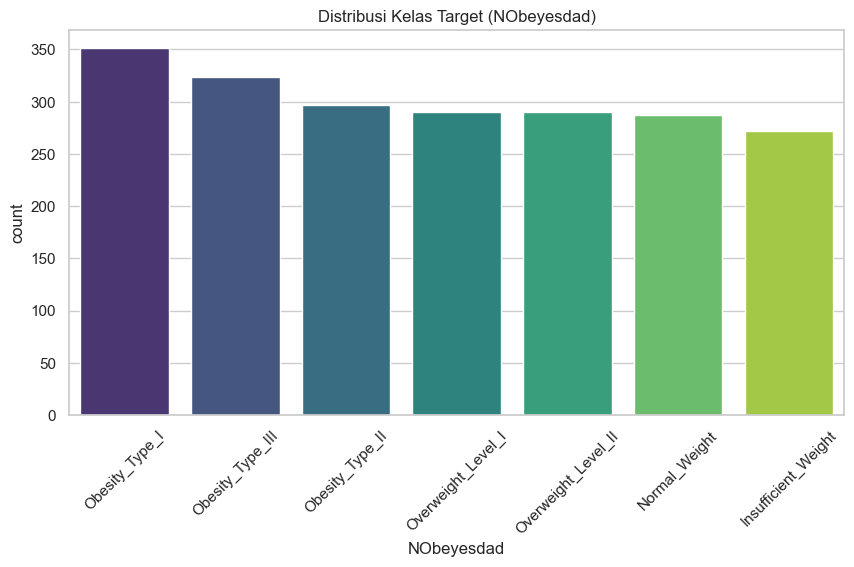

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.show()


* Distribusi target terlihat tidak merata, makan nanti akan kita lakukan oversampling

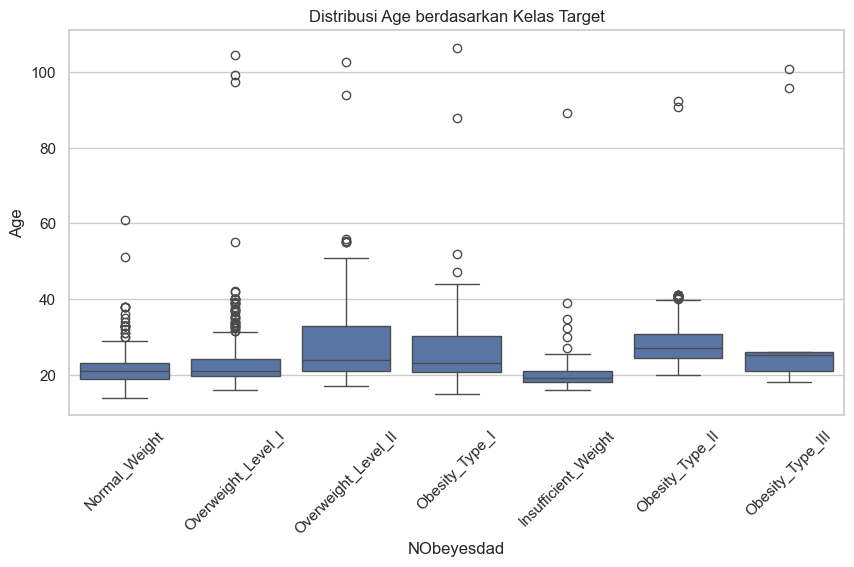

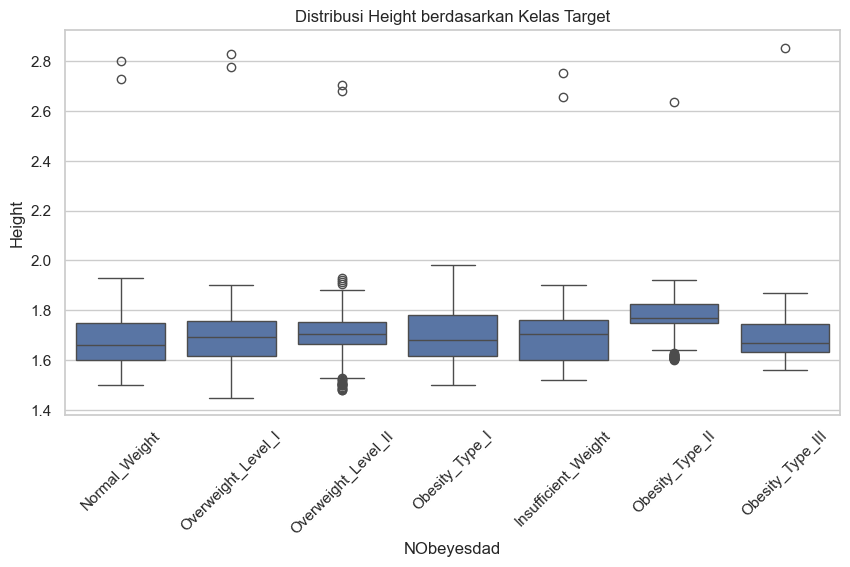

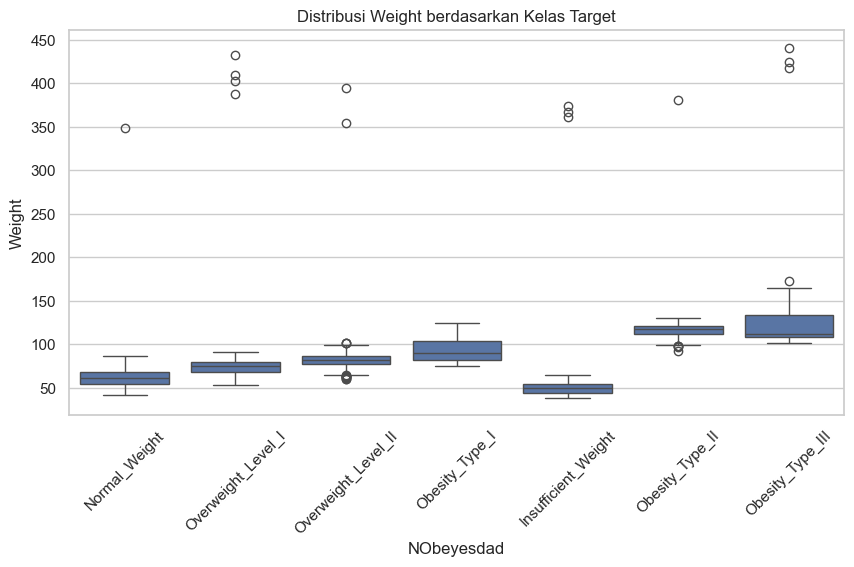

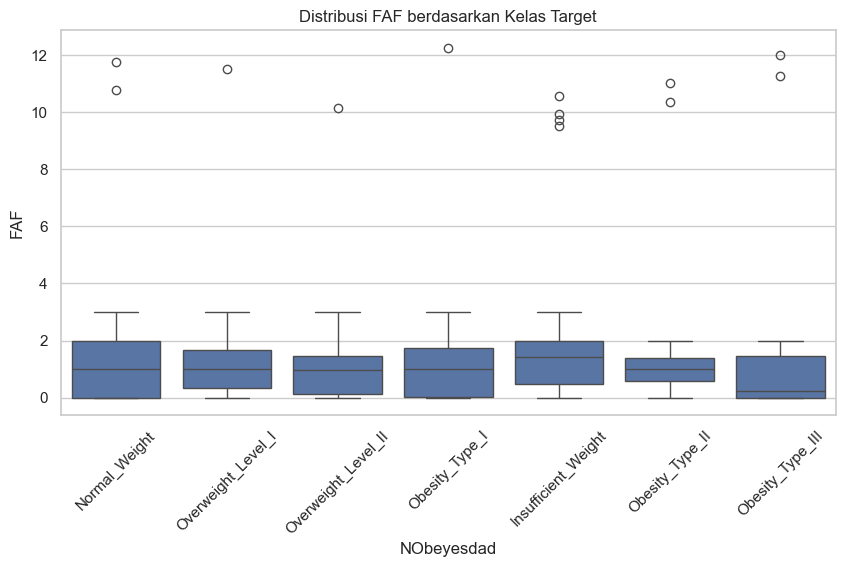

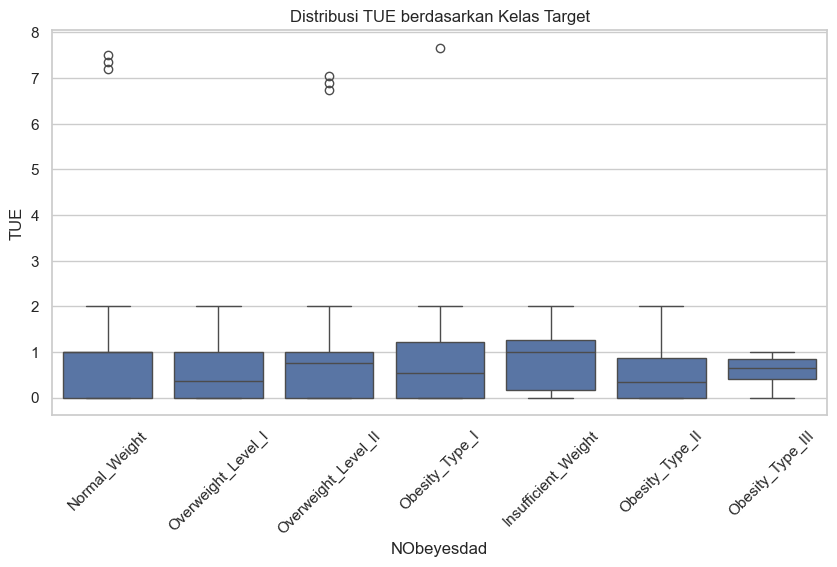

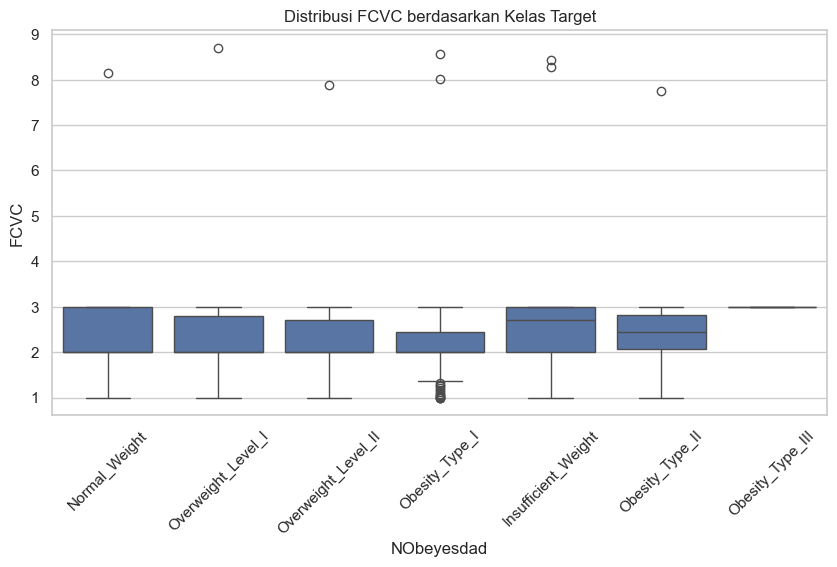

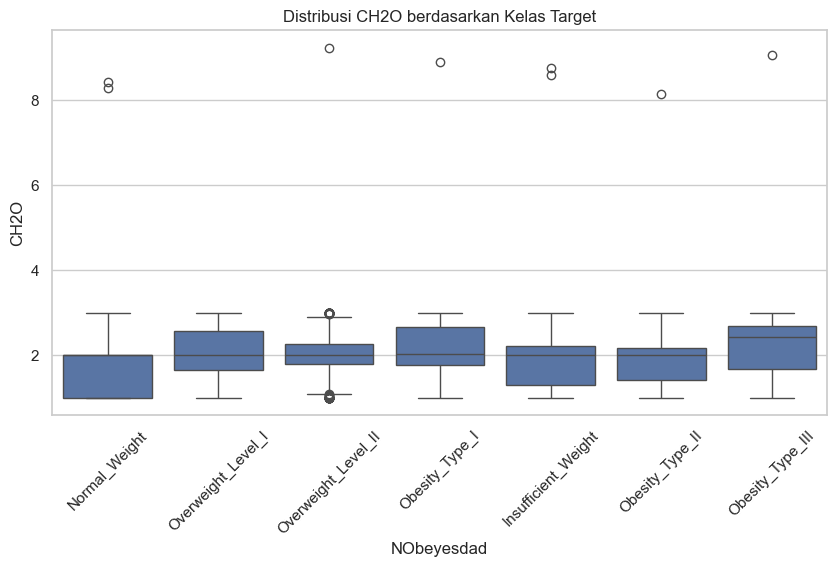

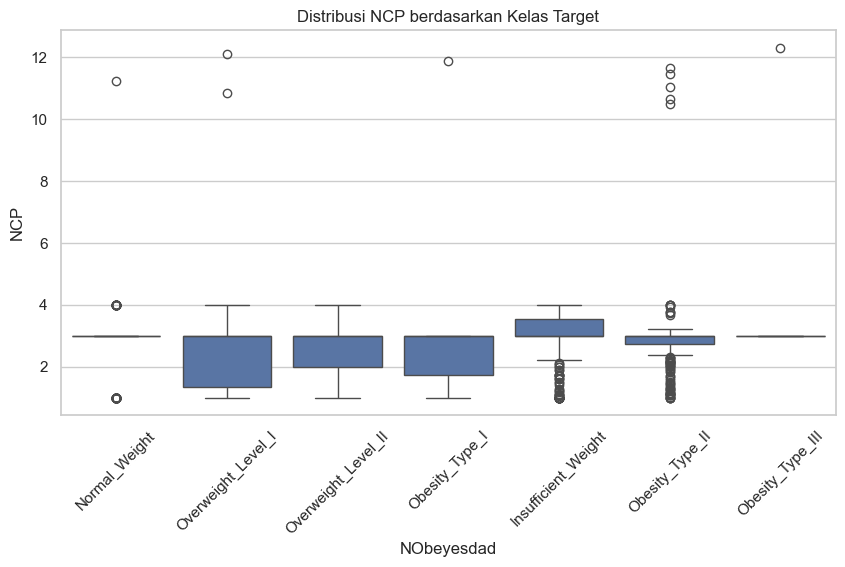

In [35]:
for col in cols_numerik:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='NObeyesdad', y=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col} berdasarkan Kelas Target')
    plt.show()


* Pada age, height, weight terlihat jelas ada beberapa outlier di sana

### Kesimpulan EDA

**Informasi Umum:**

* **Jumlah Baris:** 2.111 entri
* **Jumlah Kolom:** 17
* **Tipe Data:** Semua kolom saat ini dibaca sebagai *object* (kemungkinan karena masalah format seperti koma, karakter khusus, atau tipe data campuran).
* **Variabel Target:** `NObeyesdad` — merupakan label kategorikal yang merepresentasikan tingkat obesitas (contohnya: *Normal\_Weight*, *Obesity\_Type\_I*, dll.)

---

**Masalah Penting yang Perlu Diperhatikan:**

**Inkonsistensi Tipe Data:**

* Kolom seperti `Age`, `Height`, `Weight`, `FAF`, `TUE`, `FCVC`, `CH2O`, `NCP` seharusnya bertipe numerik, tapi tersimpan sebagai *object*.
* Kita perlu mengonversinya setelah proses *cleaning* (misalnya, mengganti koma dengan titik, menghapus karakter tidak valid).

**Nilai yang Hilang (Missing Values):** Beberapa kolom memiliki nilai yang hilang. 

**Ketidakseimbangan Kelas pada Target:** Kelas paling sering pada `NObeyesdad` adalah *Obesity\_Type\_I* (351 dari 2.111), menunjukkan adanya ketidakseimbangan kelas yang perlu diperhatikan saat melatih model.

**Outlier:** Pada age, height, weight terlihat jelas ada beberapa outlier di sana

## 2. DATA CLEANING

In [36]:
df = df.drop_duplicates()

In [37]:
df = df.dropna()

In [38]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Weight')
df = remove_outliers(df, 'Height')


In [39]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Series([], dtype: int64)


C:\Users\tegar\AppData\Local\Temp\ipykernel_5692\193801691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


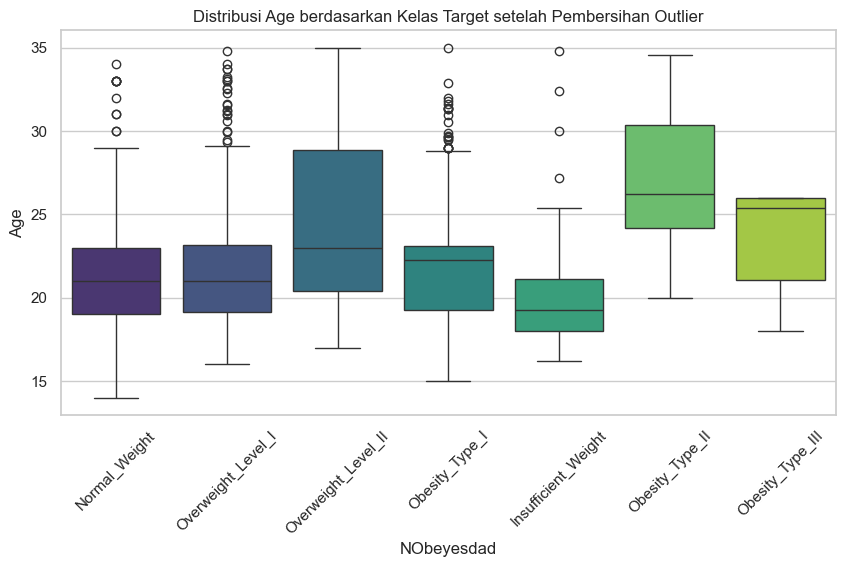

C:\Users\tegar\AppData\Local\Temp\ipykernel_5692\193801691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


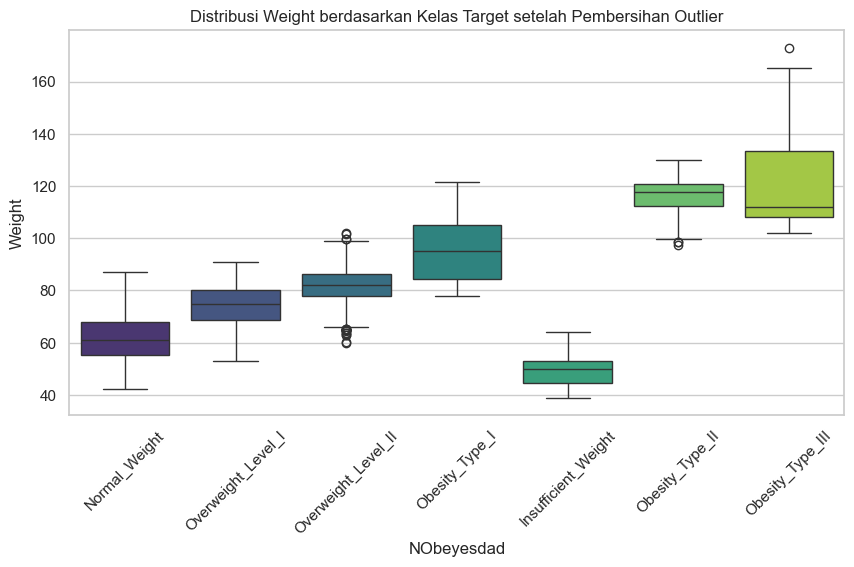

C:\Users\tegar\AppData\Local\Temp\ipykernel_5692\193801691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


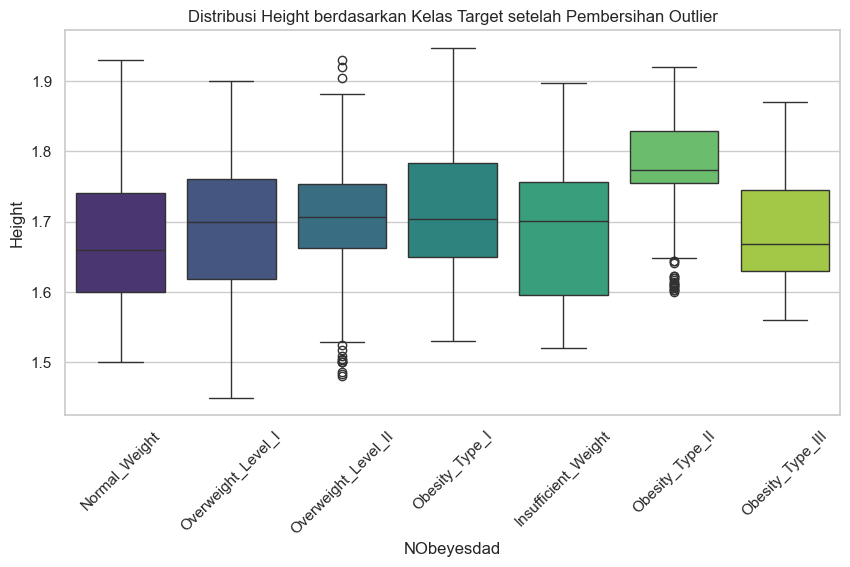

In [40]:
for col in ['Age', 'Weight', 'Height']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col} berdasarkan Kelas Target setelah Pembersihan Outlier')
    plt.show()

###  Hasil Cleaning

1. **Duplikasi Data**: Semua data duplikat telah dihapus.
2. **Nilai Hilang (Missing Values)**: Semua nilai yang hilang telah dihapus.
3. **Outlier**: Outlier pada kolom `Age`, `Height`, dan `Weight` telah dihapus menggunakan metode IQR.

## 3. Preprocessing data

In [41]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Daftar kolom kategorikal
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

# Salin data
df_encoded = df.copy()

# Encode kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode target label
le_target = LabelEncoder()
df_encoded['NObeyesdad'] = le_target.fit_transform(df_encoded['NObeyesdad'])

# Pisahkan fitur dan target
X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

# Normalisasi kolom numerik
cols_numerik = ['Age', 'Height', 'Weight', 'FAF', 'TUE', 'FCVC', 'CH2O', 'NCP']
scaler = MinMaxScaler()
X[cols_numerik] = scaler.fit_transform(X[cols_numerik])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


C:\Users\tegar\AppData\Local\Temp\ipykernel_5692\3465054069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, order=y_train.value_counts().index, palette='viridis')


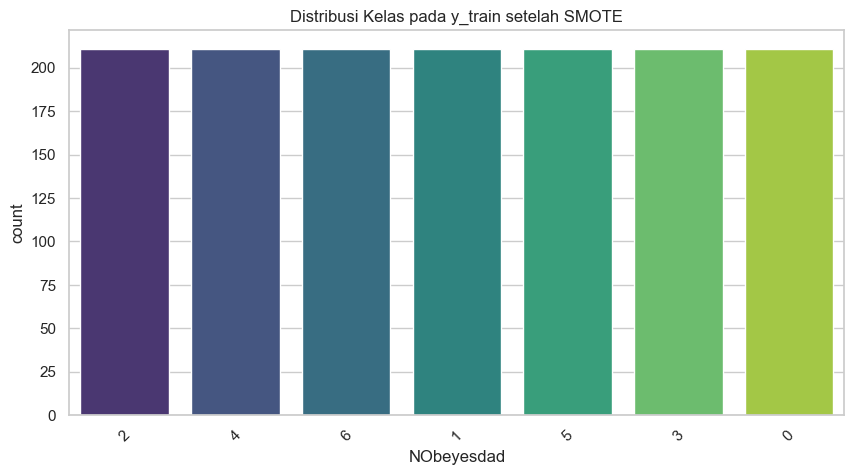

C:\Users\tegar\AppData\Local\Temp\ipykernel_5692\3465054069.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, order=y_test.value_counts().index, palette='viridis')


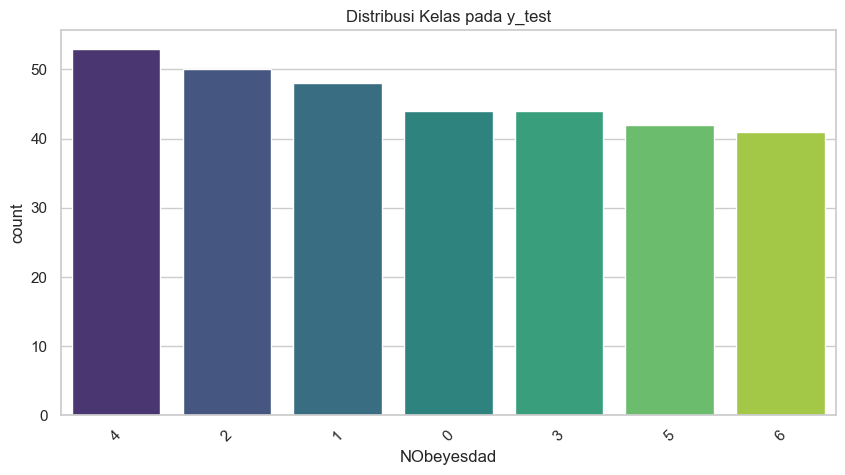

In [42]:
# Distribusi kelas pada y_train setelah SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, order=y_train.value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribusi Kelas pada y_train setelah SMOTE')
plt.show()

# Distribusi kelas pada y_test
plt.figure(figsize=(10, 5))
sns.countplot(x=y_test, order=y_test.value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribusi Kelas pada y_test')
plt.show()

### Kesimpulan Hasil Preprocessing

1. **Encoding Kategori:** Semua fitur kategorikal telah diubah menjadi nilai numerik menggunakan Label Encoding, sehingga dapat digunakan oleh algoritma machine learning.
2. **Normalisasi Data:** Fitur numerik telah dinormalisasi dengan MinMaxScaler agar berada pada rentang yang sama, sehingga mempercepat dan menstabilkan proses pelatihan model.
3. **Pembagian Data:** Data telah dibagi menjadi data latih (`X_train`, `y_train`) dan data uji (`X_test`, `y_test`) dengan proporsi 80:20 serta stratifikasi berdasarkan label target.
4. **Penyeimbangan Kelas:** Ketidakseimbangan kelas pada data latih telah diatasi menggunakan SMOTE, sehingga distribusi kelas pada `y_train` menjadi seimbang.

# 4. Pemodelan dan Machine Learning

In [43]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)



c:\Users\tegar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:45:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


1. **Model:**
    - **SVM:** Model SVM menunjukkan performa yang baik dengan akurasi tinggi dan laporan klasifikasi yang menunjukkan keseimbangan antara precision, recall, dan F1-score.
    - **KNN:** Model KNN memberikan hasil yang cukup baik, namun performanya sedikit lebih rendah dibandingkan SVM.
    - **XGBoost:** Model XGBoost memberikan hasil terbaik di antara semua model dengan akurasi tertinggi dan metrik evaluasi yang konsisten.


# 5. Evalusai Hasil

In [44]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

SVM Accuracy: 0.8229813664596274
KNN Accuracy: 0.8385093167701864
XGBoost Accuracy: 0.968944099378882


In [45]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8229813664596274
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        44
           1       0.80      0.50      0.62        48
           2       0.89      0.78      0.83        50
           3       0.91      0.95      0.93        44
           4       0.98      1.00      0.99        53
           5       0.67      0.83      0.74        42
           6       0.67      0.68      0.67        41

    accuracy                           0.82       322
   macro avg       0.82      0.82      0.81       322
weighted avg       0.83      0.82      0.82       322



In [46]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8385093167701864
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        44
           1       0.58      0.44      0.50        48
           2       0.90      0.90      0.90        50
           3       1.00      0.93      0.96        44
           4       0.98      1.00      0.99        53
           5       0.75      0.90      0.82        42
           6       0.79      0.76      0.78        41

    accuracy                           0.84       322
   macro avg       0.83      0.84      0.83       322
weighted avg       0.83      0.84      0.83       322



In [47]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.968944099378882
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       0.92      0.94      0.93        48
           2       0.96      0.98      0.97        50
           3       0.98      0.98      0.98        44
           4       1.00      1.00      1.00        53
           5       0.95      0.93      0.94        42
           6       1.00      0.95      0.97        41

    accuracy                           0.97       322
   macro avg       0.97      0.97      0.97       322
weighted avg       0.97      0.97      0.97       322



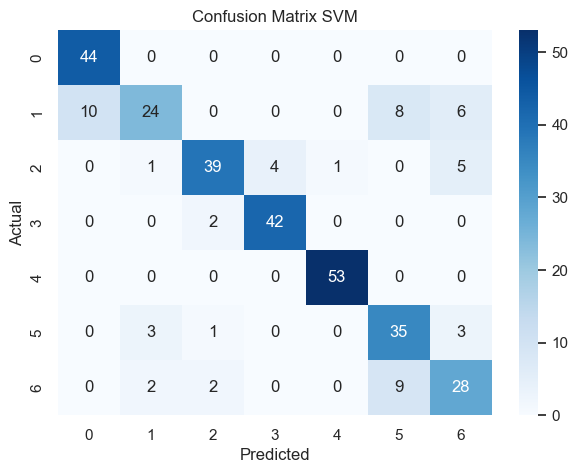

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(7,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

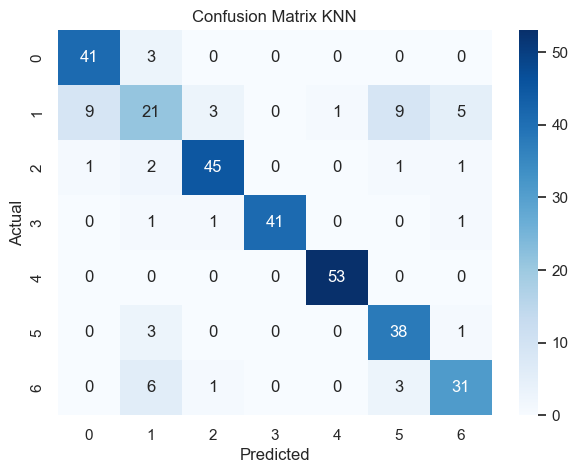

In [49]:
# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(7,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

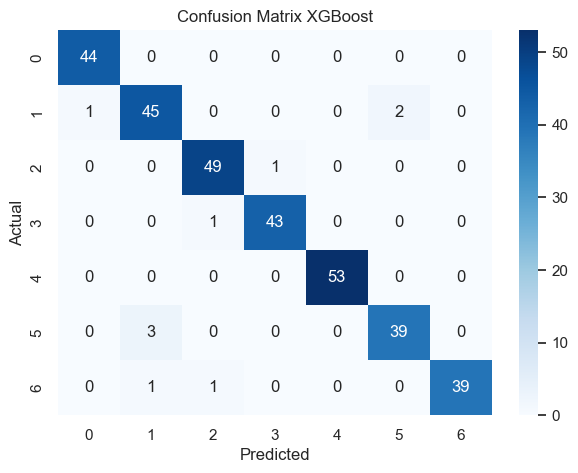

In [50]:
# XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(7,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Hyperparameter tuning dengan GridSearchCV dan Evaluasi ulang model

In [51]:
from sklearn.model_selection import GridSearchCV

# SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)
print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM Score:", grid_svm.best_score_)

# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
print("Best KNN Params:", grid_knn.best_params_)
print("Best KNN Score:", grid_knn.best_score_)

# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best XGBoost Score:", grid_xgb.best_score_)

Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Score: 0.9377027027027027
Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN Score: 0.8855955107650022


c:\Users\tegar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:46:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best XGBoost Score: 0.9708955565735227


| Model   | Akurasi Sebelum Tuning | Akurasi Setelah Tuning | Parameter Terbaik                                                 |
| ------- | ---------------------- | ---------------------- | ----------------------------------------------------------------- |
| SVM     | 0.82298                | 0.93770                | {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}                   |
| KNN     | 0.83851                | 0.88560                | {'metric': 'manhattan', 'n\_neighbors': 3, 'weights': 'distance'} |
| XGBoost | 0.96894                | 0.97090                | {'learning\_rate': 0.2, 'max\_depth': 5, 'n\_estimators': 100}    |


# 7. Kesimpulan Akhir

## 1. EDA (Exploratory Data Analysis)
- Dataset terdiri dari 2.111 baris dan 17 kolom, dengan variabel target `NObeyesdad` yang merepresentasikan tingkat obesitas.
- Ditemukan beberapa masalah: tipe data tidak konsisten (banyak kolom numerik terbaca sebagai object), adanya nilai hilang (`?`), ketidakseimbangan kelas pada target, dan outlier pada beberapa fitur numerik.

## 2. Data Cleaning
- Nilai `?` diganti dengan NaN, lalu seluruh data duplikat dan nilai hilang dihapus.
- Kolom numerik dikonversi ke tipe float setelah pembersihan karakter tidak valid.
- Outlier pada kolom `Age`, `Height`, dan `Weight` dihapus menggunakan metode IQR.
- Hasil: Data menjadi bersih, tanpa duplikasi, tanpa missing value, dan outlier utama telah diatasi.

## 3. Preprocessing Data
- Fitur kategorikal diubah menjadi numerik dengan Label Encoding.
- Fitur numerik dinormalisasi menggunakan MinMaxScaler.
- Data dibagi menjadi data latih dan data uji dengan proporsi 80:20 serta stratifikasi label target.
- Ketidakseimbangan kelas pada data latih diatasi menggunakan SMOTE sehingga distribusi kelas menjadi seimbang.

## 4. Pemodelan dan Machine Learning
- Tiga model digunakan: SVM, KNN, dan XGBoost.
- Model XGBoost memberikan akurasi tertinggi sebelum tuning, diikuti oleh KNN dan SVM.

## 5. Evaluasi Hasil
- Evaluasi dilakukan menggunakan akurasi dan classification report.
- XGBoost menunjukkan performa terbaik, diikuti oleh KNN dan SVM.
- Visualisasi confusion matrix memperlihatkan prediksi model pada masing-masing kelas.

## 6. Hyperparameter Tuning
- GridSearchCV digunakan untuk mencari parameter terbaik pada SVM, KNN, dan XGBoost.
- Setelah tuning, semua model mengalami peningkatan akurasi, terutama SVM dan KNN.
- XGBoost tetap menjadi model dengan performa terbaik.

---

**Kesimpulan Umum:**  
Proses EDA, cleaning, preprocessing, dan balancing data sangat penting untuk memastikan kualitas data sebelum pemodelan. Model XGBoost dengan hyperparameter tuning memberikan hasil terbaik untuk klasifikasi tingkat obesitas pada dataset ini. Pipeline yang sistematis dari EDA hingga tuning terbukti meningkatkan performa model secara signifikan.

| Model   | Akurasi Sebelum Tuning | Akurasi Setelah Tuning | Parameter Terbaik                                                 |
| ------- | ---------------------- | ---------------------- | ----------------------------------------------------------------- |
| SVM     | 0.82298                | 0.93770                | {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}                   |
| KNN     | 0.83851                | 0.88560                | {'metric': 'manhattan', 'n\_neighbors': 3, 'weights': 'distance'} |
| XGBoost | 0.96894                | 0.97090                | {'learning\_rate': 0.2, 'max\_depth': 5, 'n\_estimators': 100}    |
